# Import Packages

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import AUC
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
# Hides the GPU from TensorFlow
tf.config.set_visible_devices([], 'GPU') 

# Data Exploration

In [12]:
raw_data = pd.read_csv('~/Documents/My Docs/Advance Topics in PA/APA Project FIiles/proc_data_train.csv')

In [46]:
raw_data.head()

,initial_time,final_time,section,cavity,gobdiameteraverage_avg,gobdiameteraverage_min,gobdiameteraverage_max,gobdiameteraverage_std,goblengthaverage_avg,goblengthaverage_min,...,center_top_tc_std,feeder_global_avg,feeder_global_min,feeder_global_max,feeder_global_diff_min_max,feeder_global_std,rejected_Sidewall,total_Sidewall,perc_defects_Sidewall,Defects
0,2023-03-12 01:00:00,2023-03-12 02:20:00,1,2,216.973754,256.843423,74.786813,1.721593,999.922865,2899.599404,...,0.463084,3428.739146,9843.346673,6877.315512,145.198518,0.573705,4.0,447.0,0.008949,0
1,2023-03-12 01:20:00,2023-03-12 02:40:00,1,2,217.354264,256.843423,74.849225,1.933347,998.190252,2885.091023,...,0.501175,3428.837231,9843.686790,6877.315512,144.947527,0.597657,3.0,464.0,0.006466,0
2,2023-03-12 01:40:00,2023-03-12 03:00:00,1,2,217.518977,257.431206,74.849225,1.687425,1000.830804,2885.091023,...,0.477411,3428.863085,9844.792173,6876.733073,143.504326,0.581349,2.0,469.0,0.004264,0
3,2023-03-12 02:00:00,2023-03-12 03:20:00,1,2,218.170264,257.431206,75.523022,2.111324,1004.892344,2885.091023,...,0.463842,3428.932190,9844.962232,6876.733073,143.378831,0.532321,0.0,460.0,0.000000,0
4,2023-03-12 02:20:00,2023-03-12 03:40:00,1,2,218.828967,257.431206,75.690798,2.565130,1005.932142,2885.091023,...,0.428316,3428.971152,9846.322703,6876.733073,142.374865,0.462686,0.0,448.0,0.000000,0


In [14]:
raw_data.shape

(239320, 239)

In [15]:
raw_data.describe()

,section,cavity,gobdiameteraverage_avg,gobdiameteraverage_min,gobdiameteraverage_max,gobdiameteraverage_std,goblengthaverage_avg,goblengthaverage_min,goblengthaverage_max,goblengthaverage_std,...,center_top_tc_max,center_top_tc_std,feeder_global_avg,feeder_global_min,feeder_global_max,feeder_global_diff_min_max,feeder_global_std,rejected_Sidewall,total_Sidewall,perc_defects_Sidewall
count,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,...,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000,239320.000000
mean,5.237155,2.018586,241.217198,284.306529,83.505213,5.315899,937.774799,2707.030744,3165.014974,24.444875,...,3172.712382,1.075827,3426.013520,9853.180678,6887.666297,149.092685,1.389070,7.194911,465.633754,0.014636
std,2.832643,0.815209,13.621712,16.689874,4.672913,5.210246,82.323839,238.759298,279.432126,38.442730,...,7.357667,17.973202,7.441552,116.776806,19.418643,88.065655,4.410788,35.552139,430.267551,0.018720
min,1.000000,1.000000,49.900988,58.621037,17.333118,0.000000,88.396127,98.783256,478.742964,0.000000,...,3152.492339,0.000000,3406.899953,4769.130543,6840.563652,96.631685,0.000000,0.000000,101.000000,0.000000
25%,3.000000,1.000000,233.922123,275.288268,81.055125,2.340674,879.416214,2538.554936,2967.742463,9.670093,...,3169.726214,0.493384,3419.082858,9838.670054,6873.820882,128.821330,0.650726,2.000000,420.000000,0.005906
50%,5.000000,2.000000,243.311501,286.886047,84.203670,4.139561,934.810112,2699.238260,3154.396287,17.683433,...,3172.721042,0.600036,3427.894935,9857.801675,6897.176659,149.088885,0.864824,4.000000,458.000000,0.010246
75%,8.000000,3.000000,249.683008,295.040376,86.297021,6.683609,993.912712,2870.020725,3355.033158,28.823944,...,3178.383990,0.754216,3431.645480,9876.338090,6902.651580,166.721030,1.230529,7.000000,475.000000,0.017021
max,10.000000,3.000000,343.332039,363.110579,153.377320,179.450603,1406.988962,3519.137976,6352.718183,931.150393,...,3208.904013,809.978737,3439.809082,9924.719835,6931.307546,3947.906297,179.215542,9075.000000,21774.000000,0.462871


In [16]:
raw_data.columns.tolist()

['initial_time',
 'final_time',
 'section',
 'cavity',
 'gobdiameteraverage_avg',
 'gobdiameteraverage_min',
 'gobdiameteraverage_max',
 'gobdiameteraverage_std',
 'goblengthaverage_avg',
 'goblengthaverage_min',
 'goblengthaverage_max',
 'goblengthaverage_std',
 'gobtimeofarrivalaverage_avg',
 'gobtimeofarrivalaverage_min',
 'gobtimeofarrivalaverage_max',
 'gobtimeofarrivalaverage_std',
 'gobxpositionaverage_avg',
 'gobxpositionaverage_min',
 'gobxpositionaverage_max',
 'gobxpositionaverage_std',
 'gobypositionaverage_avg',
 'gobypositionaverage_min',
 'gobypositionaverage_max',
 'gobypositionaverage_std',
 'gobzspeedaverage_avg',
 'gobzspeedaverage_min',
 'gobzspeedaverage_max',
 'gobzspeedaverage_std',
 'warespacingrelativedegreesaverage_avg',
 'warespacingrelativedegreesaverage_min',
 'warespacingrelativedegreesaverage_max',
 'warespacingrelativedegreesaverage_std',
 'warespacingrelativepositionaverage_avg',
 'warespacingrelativepositionaverage_min',
 'warespacingrelativepositionav

In [17]:
missing = raw_data.isnull().sum()
for item in missing:
    if item > 0:
        print(item)

In [18]:
data_sample = raw_data.sample(3000, random_state=1)
data_sample.shape
data_sample.head()

,initial_time,final_time,section,cavity,gobdiameteraverage_avg,gobdiameteraverage_min,gobdiameteraverage_max,gobdiameteraverage_std,goblengthaverage_avg,goblengthaverage_min,...,center_top_tc_max,center_top_tc_std,feeder_global_avg,feeder_global_min,feeder_global_max,feeder_global_diff_min_max,feeder_global_std,rejected_Sidewall,total_Sidewall,perc_defects_Sidewall
115040,2023-04-28 17:40:00,2023-04-28 19:00:00,7,3,243.336766,286.589105,84.390129,4.259227,973.693245,2817.212621,...,3165.179520,0.959701,3419.260846,9848.533468,6875.684684,139.613960,1.415816,13.0,439.0,0.029613
30121,2023-08-01 08:20:00,2023-08-01 09:40:00,1,1,234.327265,277.983532,80.678449,2.834064,890.433315,2566.966404,...,3172.693817,0.410639,3429.176022,9846.917908,6906.903380,174.439015,2.373998,3.0,404.0,0.007426
69423,2023-08-26 05:00:00,2023-08-26 06:20:00,4,3,232.775384,275.188959,80.353634,12.504765,986.271377,2840.131725,...,3172.911622,0.912278,3428.550911,9855.250792,6905.738503,167.034769,1.241025,1.0,314.0,0.003185
39015,2023-03-26 05:20:00,2023-03-26 06:40:00,4,3,234.373496,275.823033,81.759759,4.555500,1002.747913,2897.949693,...,3172.557688,0.520755,3418.172404,9812.395961,6861.414945,150.908572,1.038706,5.0,475.0,0.010526
28502,2023-07-25 21:40:00,2023-07-25 23:00:00,2,3,231.374113,272.945029,79.994509,3.093841,1000.008348,2900.645822,...,3175.579742,0.627845,3430.729719,9862.903441,6904.515382,160.069758,0.693045,1.0,396.0,0.002525


# Split and Upsampling

First we created a new column called "Defects". It is a binary classefier, which signals if a bottle is defect or not. This is determined by the defect rate. If it is above 0.02 it is defective and gets a 1 and vice versa. Then we create a holdout dataset in order to test out of sample performance for the final model. Furthermore we upsample or data based on "Defects" in order to create a balanced dataset. This dataset is then furthermore split into a test and train dataset with a 0.2/0.8 split.

In [19]:
data_set = raw_data

#create binary outcome variable for defect = 1 and not defect = 0 with threshold of 2%
threshold = 0.02
data_set['Defects'] = (data_set.iloc[:, -1] > threshold).astype(int)


# Creating Holdout
non_holdout_data, holdout_data = train_test_split(data_set, test_size=0.1, random_state=5, stratify=data_set['Defects'])


# Upsample class 1
class_0 = non_holdout_data[data_set['Defects'] == 0]
class_1 = non_holdout_data[data_set['Defects'] == 1]
class_1_upsampled = class_1.sample(n=len(class_0), replace=True, random_state=5)  # Enable replacement to upsample

# Combine back the upsampled class 1 with class 0
balanced_data = pd.concat([class_0, class_1_upsampled])

#Split the Dataset
train_data, test_data = train_test_split(balanced_data, test_size=0.2, random_state=5, stratify=balanced_data['Defects'])

/var/folders/cr/048sbrkd4k5f7y4yw3rstw7m0000gn/T/ipykernel_67380/333874530.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_0 = non_holdout_data[data_set['Defects'] == 0]
/var/folders/cr/048sbrkd4k5f7y4yw3rstw7m0000gn/T/ipykernel_67380/333874530.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_1 = non_holdout_data[data_set['Defects'] == 1]


# Transform Train Data

We split the dataset columns into features and targets. In our case target is "Defects" and "perc_defects_Sidewall", the rest are considered features. Intial time and final time are substracted from each other to gain the duration of the process and another column is created to accomodate this feature. Unessecary features are droped. This process is repeated for the holdoutdata, test data and train data.

In [20]:


#split dataset in features_train and outcome 
features_train = train_data.iloc[:, :-2] 
target_reg_train = train_data.iloc[:, -2] 
target_cat_train = train_data.iloc[:, -1] 

#convert target to categorical
#target1r =
#target2r =
target_cat_train = to_categorical(target_cat_train)

#Handle Timestamps in features dataset
# Convert initial_time and final_time to datetime, and create a new feature 'duration'
features_train['initial_time'] = pd.to_datetime(features_train['initial_time'])
features_train['final_time'] = pd.to_datetime(features_train['final_time'])
features_train['duration'] = (features_train['final_time'] - features_train['initial_time']).dt.total_seconds() / 60.0  # duration in minutes

#drop not needed features
features_train = features_train.drop(['initial_time', 'final_time', 'reference', 'production', 'rejected_Sidewall', 'total_Sidewall'], axis=1)
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)

features_train.shape

(279489, 233)

# Transform Test data

In [21]:
# data_set.iloc[:, -1] = (data_set.iloc[:, -1] > threshold).astype(int)
# data_set.rename(columns={'perc_defects_Sidewall': 'Defects'}, inplace=True)

#split dataset in features and outcome 
features_test = test_data.iloc[:, :-2]  # All rows, all columns except the last one
target_reg_test = test_data.iloc[:, -2] 
target_cat_test = test_data.iloc[:, -1] 

#convert target to categorical
#target1r =
#target2r =
target_cat_test = to_categorical(target_cat_test)

#Handle Timestamps in features dataset
# Convert initial_time and final_time to datetime, and create a new feature 'duration'
features_test['initial_time'] = pd.to_datetime(features_test['initial_time'])
features_test['final_time'] = pd.to_datetime(features_test['final_time'])
features_test['duration'] = (features_test['final_time'] - features_test['initial_time']).dt.total_seconds() / 60.0  # duration in minutes

#drop not needed features
features_test = features_test.drop(['initial_time', 'final_time', 'reference', 'production', 'rejected_Sidewall', 'total_Sidewall'], axis=1)
scaler = StandardScaler()
features_test = scaler.fit_transform(features_test)

features_test.shape


(69873, 233)

# Transform Holdout Data

In [22]:
# data_set.iloc[:, -1] = (data_set.iloc[:, -1] > threshold).astype(int)
# data_set.rename(columns={'perc_defects_Sidewall': 'Defects'}, inplace=True)

#split dataset in features and outcome 
features_holdout = holdout_data.iloc[:, :-2]  # All rows, all columns except the last one
target_reg_holdout = holdout_data.iloc[:, -2] 
target_cat_holdout = holdout_data.iloc[:, -1] 

#convert target to categorical
#target1r =
#target2r =
target_cat_holdout = to_categorical(target_cat_holdout)

#Handle Timestamps in features dataset
# Convert initial_time and final_time to datetime, and create a new feature 'duration'
features_holdout['initial_time'] = pd.to_datetime(features_holdout['initial_time'])
features_holdout['final_time'] = pd.to_datetime(features_holdout['final_time'])
features_holdout['duration'] = (features_holdout['final_time'] - features_holdout['initial_time']).dt.total_seconds() / 60.0  # duration in minutes

#drop not needed features
features_holdout = features_holdout.drop(['initial_time', 'final_time', 'reference', 'production', 'rejected_Sidewall', 'total_Sidewall'], axis=1)
scaler = StandardScaler()
features_holdout = scaler.fit_transform(features_holdout)

features_holdout.shape

(23932, 233)

# Model Definition and Fitting

First, a base model is created using the Sequential API. This model consists of three dense layers with 'relu' activation, a batch normalization layer, and a dropout layer. The input shape for the first layer is 233.

An input layer is then created with the same shape as the base model. The base model is applied to this input to get an intermediate output.

Two output layers are defined: a regression output with one neuron and 'relu' activation, and a categorical output with two neurons and 'softmax' activation.

A model is created with the defined input and the two outputs. This model is compiled with the Stochastic Gradient Descent (SGD) optimizer. Different loss functions are used for the two outputs: mean squared error for the regression output and categorical cross-entropy for the categorical output. Metrics for evaluation are also defined for each output.

Early stopping is set up to monitor the validation loss and stop training when it doesn't improve after 7 epochs. The learning rate is reduced by a factor of 0.1 if no improvement is seen after 3 epochs.

Finally, the model is trained on the training data for a maximum of 100 epochs with a batch size of 128. The model validation is done on 20% of the training data. The early stopping and learning rate reduction are applied during training. The training history is stored in a variable.

This step is repeated over the other models only with a different optimizer, which is adam and a model architecture that incorporates BatchNormalization after every Dense layer.

## Model with SDG

In [23]:
# model = Sequential([
#   layers.Dense(175, activation='relu', input_shape=(233,)),
#   layers.BatchNormalization(),
#   layers.Dense(175, activation='relu'),
#   layers.BatchNormalization(),
#   layers.Dense(175, activation='relu'),
#   layers.BatchNormalization(),
#   layers.Dense(175, activation='relu'),
#   layers.BatchNormalization(),
#   layers.Dense(175, activation='relu'),
#   layers.BatchNormalization(),
#   layers.Dense(175, activation='relu'),
#   layers.BatchNormalization(),
#   layers.Dense(2, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy']) #optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.99)

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.0001)

# model.fit(features, target, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])


# Define the base of the model using the Sequential API
base_model = Sequential([
    layers.Dense(256, activation='relu', input_shape=(233,)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),                                                            #
    #layers.Dense(32, activation='relu'),
])

# Create the input layer
inputs = Input(shape=(233,))

# Get the output from the base model
x = base_model(inputs)

# Define the two regression outputs
regression_output = layers.Dense(1, activation='relu', name='regression_output')(x)


# Define the categorical output
categorical_output = layers.Dense(2, activation='softmax', name='categorical_output')(x)

# Create the Model with one input and three outputs
model_SGD = Model(inputs=inputs, outputs=[regression_output, categorical_output])

# Compile the model with appropriate loss functions and metrics
model_SGD.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),  #0.001 0.9
              loss={
                  'regression_output': 'mean_squared_error',
                  'categorical_output': 'categorical_crossentropy'
              },
              metrics={
                  'regression_output': ['mse'],
                  'categorical_output': ['accuracy', 'AUC']
              })

# Setup for early stopping to monitor the validation loss and stop training when it begins to increase
early_stopping = [
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True, min_delta=0.00001),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.1)
    ]

# Fit the model (assuming 'features' and 'target' are defined and formatted appropriately for a multi-output model)
# This will need to be adjusted based on how your actual target data is structured
history_SGD = model_SGD.fit(features_train, {'regression_output': target_reg_train, 'categorical_output': target_cat_train}, 
          epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])


2024-05-28 23:49:15.485683: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
1747/1747 [==============================] - 3s 2ms/step - loss: 0.6510 - regression_output_loss: 0.0027 - categorical_output_loss: 0.6483 - regression_output_mse: 0.0027 - categorical_output_accuracy: 0.6233 - categorical_output_auc: 0.6732 - val_loss: 0.6156 - val_regression_output_loss: 0.0014 - val_categorical_output_loss: 0.6142 - val_regression_output_mse: 0.0014 - val_categorical_output_accuracy: 0.6575 - val_categorical_output_auc: 0.7208 - lr: 0.0010
Epoch 2/100
1747/1747 [==============================] - 3s 1ms/step - loss: 0.6104 - regression_output_loss: 0.0014 - categorical_output_loss: 0.6090 - regression_output_mse: 0.0014 - categorical_output_accuracy: 0.6632 - categorical_output_auc: 0.7269 - val_loss: 0.5957 - val_regression_output_loss: 0.0014 - val_categorical_output_loss: 0.5943 - val_regression_output_mse: 0.0014 - val_categorical_output_accuracy: 0.6773 - val_categorical_output_auc: 0.7465 - lr: 0.0010
Epoch 3/100
1747/1747 [=========================

## Model with Adam

In [24]:
#Most code is unnecessary here but is kept to not introduce any mistakes



base_model = Sequential([
    layers.Dense(256, activation='relu', input_shape=(233,)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),                                                            #
    #layers.Dense(32, activation='relu'),
])

# Create the input layer
inputs = Input(shape=(233,))

# Get the output from the base model
x = base_model(inputs)

# Define the two regression outputs
regression_output = layers.Dense(1, activation='relu', name='regression_output')(x)


# Define the categorical output
categorical_output = layers.Dense(2, activation='softmax', name='categorical_output')(x)

# Create the Model with one input and three outputs
model_adam = Model(inputs=inputs, outputs=[regression_output, categorical_output])

# Compile the model with appropriate loss functions and metrics
model_adam.compile('adam',  #0.001 0.9
              loss={
                  'regression_output': 'mean_squared_error',
                  'categorical_output': 'categorical_crossentropy'
              },
              metrics={
                  'regression_output': ['mse'],
                  'categorical_output': ['accuracy', 'AUC']
              })

# Setup for early stopping to monitor the validation loss and stop training when it begins to increase
early_stopping = [
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True, min_delta=0.00001),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.1)
    ]

# Fit the model (assuming 'features' and 'target' are defined and formatted appropriately for a multi-output model)
# This will need to be adjusted based on how your actual target data is structured
history_adam = model_adam.fit(features_train, {'regression_output': target_reg_train, 'categorical_output': target_cat_train}, 
          epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1747/1747 [==============================] - 4s 2ms/step - loss: 0.5993 - regression_output_loss: 0.0016 - categorical_output_loss: 0.5977 - regression_output_mse: 0.0016 - categorical_output_accuracy: 0.6753 - categorical_output_auc: 0.7417 - val_loss: 0.5605 - val_regression_output_loss: 0.0014 - val_categorical_output_loss: 0.5591 - val_regression_output_mse: 0.0014 - val_categorical_output_accuracy: 0.7040 - val_categorical_output_auc: 0.7821 - lr: 0.0010
Epoch 2/100
1747/1747 [==============================] - 3s 2ms/step - loss: 0.5446 - regression_output_loss: 0.0014 - categorical_output_loss: 0.5432 - regression_output_mse: 0.0014 - categorical_output_accuracy: 0.7186 - categorical_output_auc: 0.7980 - val_loss: 0.5253 - val_regression_output_loss: 0.0014 - val_categorical_output_loss: 0.5240 - val_regression_output_mse: 0.0014 - val_categorical_output_accuracy: 0.7331 - val_categorical_output_auc: 0.8146 - lr: 0.0010
Epoch 3/100
1747/1747 [=========================

## Model with constant BatchNormailzation

In [25]:
#Most code is unnecessary here but is kept to not introduce any mistakes



base_model = Sequential([
    layers.Dense(800, activation='relu', input_shape=(233,)),
    layers.BatchNormalization(),
    layers.Dense(400, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(150, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),                                                          #
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
])

# Create the input layer
inputs = Input(shape=(233,))

# Get the output from the base model
x = base_model(inputs)

# Define the two regression outputs
regression_output = layers.Dense(1, activation='relu', name='regression_output')(x)


# Define the categorical output
categorical_output = layers.Dense(2, activation='softmax', name='categorical_output')(x)

# Create the Model with one input and three outputs
model_batch = Model(inputs=inputs, outputs=[regression_output, categorical_output])

# Compile the model with appropriate loss functions and metrics
model_batch.compile('adam',  #0.001 0.9
              loss={
                  'regression_output': 'mean_squared_error',
                  'categorical_output': 'categorical_crossentropy'
              },
              metrics={
                  'regression_output': ['mse'],
                  'categorical_output': ['accuracy', 'AUC']
              })

# Setup for early stopping to monitor the validation loss and stop training when it begins to increase
early_stopping = [
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True, min_delta=0.00001),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.1)
    ]

# Fit the model (assuming 'features' and 'target' are defined and formatted appropriately for a multi-output model)
# This will need to be adjusted based on how your actual target data is structured
history_batch = model_batch.fit(features_train, {'regression_output': target_reg_train, 'categorical_output': target_cat_train}, 
          epochs=150, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/150
1747/1747 [==============================] - 10s 5ms/step - loss: 0.6132 - regression_output_loss: 0.0060 - categorical_output_loss: 0.6073 - regression_output_mse: 0.0060 - categorical_output_accuracy: 0.6679 - categorical_output_auc: 0.7317 - val_loss: 0.5654 - val_regression_output_loss: 0.0014 - val_categorical_output_loss: 0.5640 - val_regression_output_mse: 0.0014 - val_categorical_output_accuracy: 0.7013 - val_categorical_output_auc: 0.7786 - lr: 0.0010
Epoch 2/150
1747/1747 [==============================] - 9s 5ms/step - loss: 0.5503 - regression_output_loss: 0.0015 - categorical_output_loss: 0.5487 - regression_output_mse: 0.0015 - categorical_output_accuracy: 0.7165 - categorical_output_auc: 0.7935 - val_loss: 0.5253 - val_regression_output_loss: 0.0014 - val_categorical_output_loss: 0.5239 - val_regression_output_mse: 0.0014 - val_categorical_output_accuracy: 0.7361 - val_categorical_output_auc: 0.8154 - lr: 0.0010
Epoch 3/150
1747/1747 [========================

In [26]:
#model.summary()

# Model Evaluation

To compare the models with each other we use the test dataset to compare predictions with targets. 

## Evaluation Test Data

In [27]:
model_SGD.evaluate(features_test, [target_reg_test, target_cat_test])


2184/2184 [==============================] - 1s 502us/step - loss: 0.2848 - regression_output_loss: 0.0013 - categorical_output_loss: 0.2835 - regression_output_mse: 0.0013 - categorical_output_accuracy: 0.8873 - categorical_output_auc: 0.9521


[0.28475674986839294,
 0.0012976734433323145,
 0.2834596633911133,
 0.0012976734433323145,
 0.8872525691986084,
 0.9520988464355469]

In [28]:
model_adam.evaluate(features_test, [target_reg_test, target_cat_test])

2184/2184 [==============================] - 1s 506us/step - loss: 0.2556 - regression_output_loss: 0.0013 - categorical_output_loss: 0.2543 - regression_output_mse: 0.0013 - categorical_output_accuracy: 0.9059 - categorical_output_auc: 0.9645


[0.2555706799030304,
 0.0012976734433323145,
 0.25427311658859253,
 0.0012976734433323145,
 0.905872106552124,
 0.9644667506217957]

In [29]:
model_batch.evaluate(features_test, [target_reg_test, target_cat_test])

2184/2184 [==============================] - 2s 790us/step - loss: 0.2352 - regression_output_loss: 0.0013 - categorical_output_loss: 0.2340 - regression_output_mse: 0.0013 - categorical_output_accuracy: 0.9282 - categorical_output_auc: 0.9723


[0.23524868488311768,
 0.0012976734433323145,
 0.23395104706287384,
 0.0012976734433323145,
 0.9281696677207947,
 0.9722997546195984]

The adam optimizer show clearly better results, that is why it was choosen for the final model "model_batch"

## Evaluation Holdout

Here we further test our model on the holdout data, which is not upsampled, to test out of batch performance of our final model. Also the other models are tested out of curiosity.

In [30]:
model_SGD.evaluate(features_holdout, [target_reg_holdout, target_cat_holdout])

748/748 [==============================] - 0s 538us/step - loss: 0.4222 - regression_output_loss: 5.4869e-04 - categorical_output_loss: 0.4216 - regression_output_mse: 5.4869e-04 - categorical_output_accuracy: 0.8250 - categorical_output_auc: 0.9096


[0.4221813976764679,
 0.000548690790310502,
 0.42163264751434326,
 0.000548690790310502,
 0.8250459432601929,
 0.9095830917358398]

In [31]:
model_adam.evaluate(features_holdout, [target_reg_holdout, target_cat_holdout])

748/748 [==============================] - 0s 519us/step - loss: 0.4574 - regression_output_loss: 5.4869e-04 - categorical_output_loss: 0.4569 - regression_output_mse: 5.4869e-04 - categorical_output_accuracy: 0.8376 - categorical_output_auc: 0.9268


[0.4574055075645447,
 0.000548690790310502,
 0.4568568766117096,
 0.000548690790310502,
 0.83758145570755,
 0.9268087148666382]

In [32]:
model_batch.evaluate(features_holdout, [target_reg_holdout, target_cat_holdout])

748/748 [==============================] - 1s 798us/step - loss: 0.4725 - regression_output_loss: 5.4869e-04 - categorical_output_loss: 0.4719 - regression_output_mse: 5.4869e-04 - categorical_output_accuracy: 0.8676 - categorical_output_auc: 0.9383


[0.4724702537059784,
 0.000548690790310502,
 0.4719213843345642,
 0.000548690790310502,
 0.8676249384880066,
 0.9382568001747131]

# Graphs

To further illustrate the perfomance of our model, we created a ROC plot. This also compares the first model to the last model. No plot for the accuracy of teh regression output was made because there was no improvement throughout the models. The mse stayed the same model to model.

748/748 [==============================] - 1s 694us/step


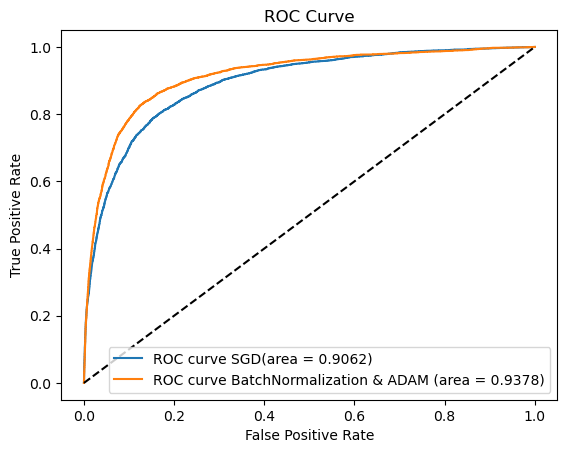

<Figure size 640x480 with 0 Axes>

In [33]:
# Predict probabilities for the categorical output
y_pred_prob_SGD = model_SGD.predict(features_holdout)[1]  # Assuming the second output is the categorical one
y_pred_prob_batch = model_batch.predict(features_holdout)[1]

# Extract the probabilities for the positive class (index 1)
y_pred_prob_pos_SGD= y_pred_prob_SGD[:, 1]
y_pred_prob_pos_batch = y_pred_prob_batch[:, 1]

# Compute the ROC curve and AUC score for the positive class
fpr_SGD, tpr_SGD, _ = roc_curve(target_cat_holdout[:, 1], y_pred_prob_pos_SGD)
roc_auc_SGD = auc(fpr_SGD,tpr_SGD)

fpr_batch, tpr_batch, _ = roc_curve(target_cat_holdout[:, 1], y_pred_prob_pos_batch)
roc_auc_batch = auc(fpr_batch,tpr_batch)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_SGD, tpr_SGD, label=f'ROC curve SGD(area = 0.9062)')
plt.plot(fpr_batch, tpr_batch, label=f'ROC curve BatchNormalization & ADAM (area = 0.9378)')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
plt.savefig('roc_curve.png')

# Saving Model

In [34]:
# Saving a model
#model_adam.save('model_out_adam.h5')
#model_SGD.save('model_out_SGD.h5')
model_batch.save('model_out_batch.keras')

Test dataset results:

In [63]:
test_data = pd.read_csv('~/Documents/My Docs/Advance Topics in PA/APA Project FIiles/proc_data_test_students.csv',delimiter=';')

In [64]:
test_data.head(10)

,initial_time,final_time,section,cavity,gobdiameteraverage_avg,gobdiameteraverage_min,gobdiameteraverage_max,gobdiameteraverage_std,goblengthaverage_avg,goblengthaverage_min,...,production,center_top_tc_avg,center_top_tc_min,center_top_tc_max,center_top_tc_std,feeder_global_avg,feeder_global_min,feeder_global_max,feeder_global_diff_min_max,feeder_global_std
0,31/08/2023 23:20,01/09/2023 00:40,1,2,215.694660,255.892133,74.105771,9.464855,1051.704749,3035.874078,...,2796B123UVA_23/08/2023,8649.392081,6816.379009,3172.312657,0.444773,3428.784340,9860.097470,6904.340651,161.952193,1.105749
1,31/08/2023 23:40,01/09/2023 01:00,1,2,215.979741,256.893302,74.105771,13.173013,1055.352268,3064.549153,...,2796B123UVA_23/08/2023,8649.333417,6816.379009,3172.312657,0.472326,3428.780572,9860.097470,6903.758213,161.324715,1.108167
2,01/09/2023 00:00,01/09/2023 01:20,1,2,217.296343,256.893302,75.456263,9.465147,1049.671530,3018.143689,...,2796B123UVA_23/08/2023,8649.585489,6816.379009,3172.557688,0.551891,3428.901827,9860.607646,6903.758213,160.948228,1.215840
3,01/09/2023 00:20,01/09/2023 01:40,1,2,217.947856,256.893302,75.456263,12.930391,1046.292321,3018.143689,...,2796B123UVA_23/08/2023,8649.925557,6816.671647,3172.557688,0.525634,3429.055589,9862.733382,6903.758213,159.379532,1.156055
4,01/09/2023 00:40,01/09/2023 02:00,1,2,219.256815,260.007334,75.456263,12.046937,1048.182278,3018.143689,...,2796B123UVA_23/08/2023,8649.821062,6816.671647,3172.557688,0.544653,3429.039656,9863.158529,6903.758213,159.065792,0.712606
5,01/09/2023 01:00,01/09/2023 02:20,1,2,218.611838,258.505939,75.456263,8.859397,1046.058448,3018.143689,...,2796B123UVA_23/08/2023,8649.749565,6816.905759,3172.557688,0.537467,3429.053805,9863.583676,6903.758213,158.752053,0.674876
6,01/09/2023 01:20,01/09/2023 02:40,1,2,217.952984,258.505939,74.994645,12.521846,1049.932646,3028.319576,...,2796B123UVA_23/08/2023,8649.579990,6816.613120,3172.666591,0.574401,3429.006987,9863.583676,6903.699969,158.689305,0.699650
7,01/09/2023 01:40,01/09/2023 03:00,1,2,219.853926,258.505939,76.734718,9.319123,1047.750043,3028.319576,...,2796B123UVA_23/08/2023,8649.532325,6816.613120,3172.666591,0.538612,3428.983779,9863.583676,6903.699969,158.689305,0.616875
8,01/09/2023 02:00,01/09/2023 03:20,1,2,220.488847,258.505939,76.734718,12.729786,1042.597813,3028.319576,...,2796B123UVA_23/08/2023,8649.853144,6816.613120,3172.857171,0.582254,3429.062824,9864.519000,6904.573626,158.940297,0.696434
9,01/09/2023 02:20,01/09/2023 03:40,1,2,223.892925,266.040188,76.897423,10.095118,1038.573160,3004.921975,...,2796B123UVA_23/08/2023,8649.942973,6816.613120,3172.857171,0.545204,3429.046871,9864.008823,6904.573626,159.316784,0.704763


In [66]:


import pandas as pd
from sklearn.preprocessing import StandardScaler

# Handle Timestamps in features dataset
# Convert initial_time and final_time to datetime, and create a new feature 'duration'
test_data['initial_time'] = pd.to_datetime(test_data['initial_time'], dayfirst=True)
test_data['final_time'] = pd.to_datetime(test_data['final_time'], dayfirst=True)
test_data['duration'] = (test_data['final_time'] - test_data['initial_time']).dt.total_seconds() / 60.0  # duration in minutes

# Drop not needed features
test_data = test_data.drop(['initial_time', 'final_time', 'reference', 'production'], axis=1)

# Apply StandardScaler to the test data
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

# Check the shape of the processed test_data
print(test_data.shape)


(44161, 233)


In [ ]:
#split dataset in features and outcome 
features_test = holdout_data.iloc[:, :-2]  # All rows, all columns except the last one
target_reg_holdout = holdout_data.iloc[:, -2] 
target_cat_holdout = holdout_data.iloc[:, -1] 

#convert target to categorical
#target1r =
#target2r =
target_cat_holdout = to_categorical(target_cat_holdout)

In [77]:
import numpy as np
import pandas as pd
import os

# Assuming model_API is your trained model and scaled_test_data is the preprocessed test data

# Make predictions
predictions = model_batch.predict(test_data)

# Separate predictions for regression and classification outputs
predictions_reg = predictions[0]  # Regression output (perc_defects_Sidewall)
predictions_class = predictions[1]  # Classification output (has_deffect probabilities)

# Create a DataFrame with the desired columns
output_df = pd.DataFrame({
    'perc_defects_Sidewall': predictions_reg.flatten(),  # Assuming regression output is already the required value
    'has_deffect': predictions_class[:, 1]  # Probability of defect
})

# Convert DataFrame to a string with columns separated by ";"
output_str = output_df.to_csv(index=False, sep=';')

# Define the directory and filename
output_dir = 'output'
output_filename = 'predictions_output.csv'
output_path = os.path.join(output_dir, output_filename)

# Create the directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Save the file to the specified path
with open(output_path, 'w') as file:
    file.write(output_str)

print(f"Output saved to {output_path}")



1381/1381 [==============================] - 1s 847us/step
Output saved to output/predictions_output.csv


In [78]:
output_df

,perc_defects_Sidewall,has_deffect
0,0.0,2.310587e-01
1,0.0,6.574766e-02
2,0.0,1.083071e-01
3,0.0,3.080907e-03
4,0.0,7.791618e-07
...,...,...
44156,0.0,2.298618e-03
44157,0.0,1.591440e-03
44158,0.0,2.977833e-01
44159,0.0,1.581749e-02
